In [2]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = str(Path.cwd().resolve().parents[0])
if project_root not in sys.path:
    sys.path.append(project_root)

In [1]:
from src.data.make_dataset import collect_data_employ
employ_data = collect_data_employ()

import pandas as pd
employ_data = pd.DataFrame(employ_data)
qual =['성별','외국인학생','입학전형명','교환유학생여부','취업구분']
for col in qual:
    employ_data[col] = employ_data[col].astype('category')

employ_data.describe(include=['category'])

INFO:numexpr.utils:NumExpr defaulting to 11 threads.
INFO:src.data.make_dataset:Retrieved 1035 records


,성별,외국인학생,입학전형명,교환유학생여부,취업구분
count,1035,1035,1035,691,1035
unique,2,2,38,2,11
top,남,아니오,정시`가`군,아니오,취업자(국내)
freq,566,996,151,642,580


In [2]:
freq_취업구분 = pd.DataFrame(employ_data['취업구분'].value_counts())
freq_취업구분

,count
취업구분,
취업자(국내),580
기타,252
미상,116
진학자(국내대학원),36
1인창(사)업자,15
선택,14
프리랜서,7
진학자(국외대학원),5
취업자(해외),5


사용 가능한 한글 폰트:
- Apple LiGothic
- Apple SD Gothic Neo
- AppleGothic
- AppleMyungjo
- BIZ UDGothic
- Hiragino Maru Gothic Pro
- Malgun Gothic Boot
- Nanum Gothic
- NanumGothic
- NanumGothic
- NanumGothic
- NanumGothic
- Noto Sans Gothic
- PCMyungjo
- Toppan Bunkyu Gothic
- Toppan Bunkyu Midashi Gothic
- Tsukushi A Round Gothic
- Tsukushi B Round Gothic
- YuGothic
- YuGothic


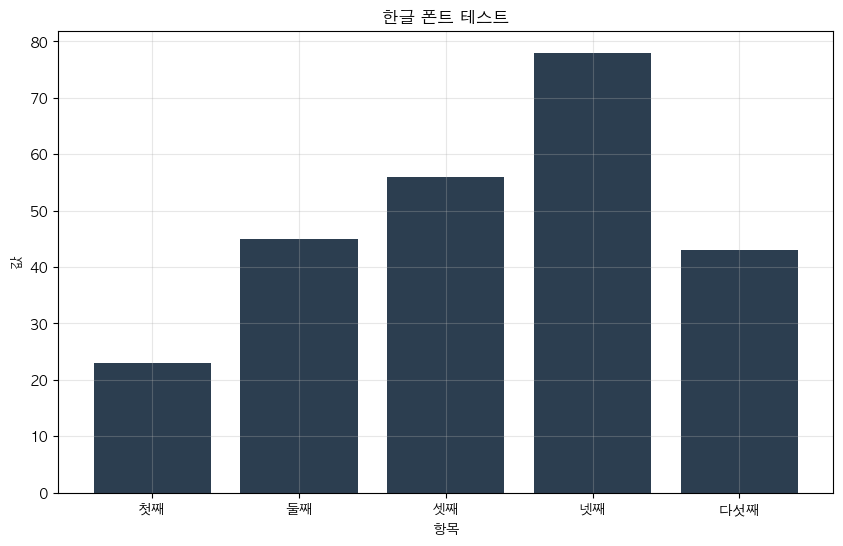

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 시스템에 설치된 폰트 목록 확인
def print_available_fonts():
    fonts = [f.name for f in fm.fontManager.ttflist]
    korean_fonts = [f for f in fonts if any(korean in f for korean in ['Gothic', 'Myungjo', '맑은', '나눔', '돋움'])]
    print("사용 가능한 한글 폰트:")
    for font in sorted(korean_fonts):
        print(f"- {font}")

# 기본 한글 폰트 설정 방법
plt.rc('font', family='AppleGothic')  # 맥OS 기본 한글 폰트

# 그래프 예시
def create_sample_graph():
    # 데이터 준비
    categories = ['첫째', '둘째', '셋째', '넷째', '다섯째']
    values = [23, 45, 56, 78, 43]
    
    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color='#2C3E50')
    plt.title('한글 폰트 테스트')
    plt.xlabel('항목')
    plt.ylabel('값')
    
    # 그리드 추가
    plt.grid(True, alpha=0.3)
    plt.show()

# 나눔고딕 폰트 사용 예시
def use_nanum_font():
    # 나눔고딕 폰트 설정
    plt.rc('font', family='NanumGothic')
    
    create_sample_graph()

# 여러 폰트를 우선순위로 설정
def set_multiple_fonts():
    plt.rc('font', family=['AppleGothic', 'NanumGothic', 'Malgun Gothic'])
    
    create_sample_graph()

# 폰트 정보 출력
print_available_fonts()

# 그래프 생성 예시
create_sample_graph()

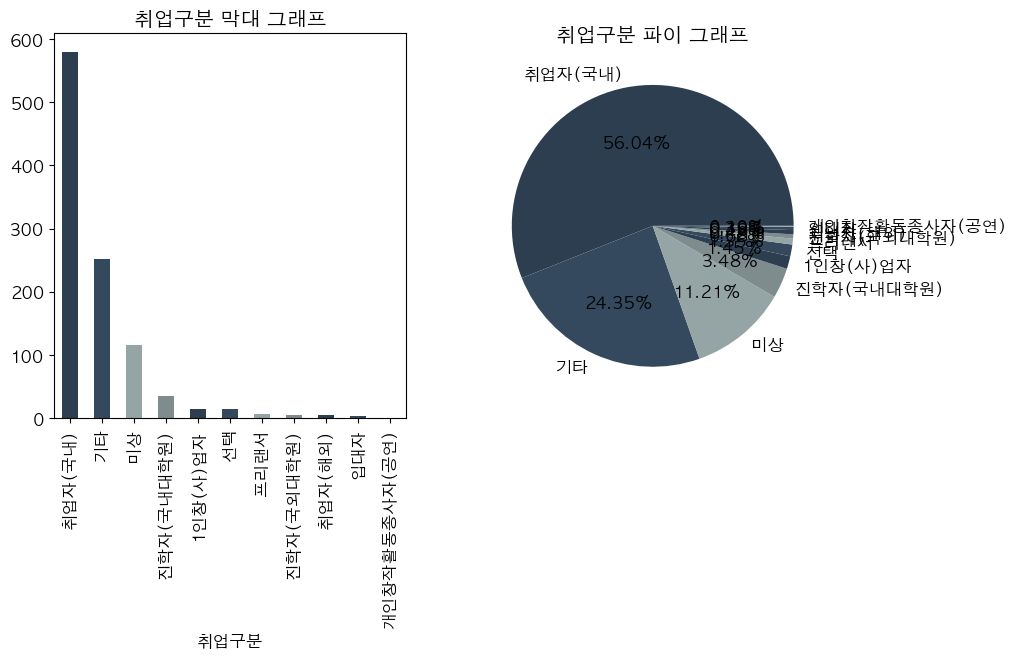

In [4]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,2, figsize=(10,5))

# 막대 그래프
ax[0].set_title('취업구분 막대 그래프')
freq_취업구분['count'].plot.bar(ax=ax[0], color=['#2c3e50','#34495e','#95a5a6','#7f8c8d'])

# 파이 그래프
ax[1].set_title('취업구분 파이 그래프')
_ = ax[1].pie(freq_취업구분['count'].values, labels=freq_취업구분.index, autopct="%.2f%%", colors=['#2c3e50','#34495e','#95a5a6','#7f8c8d'])


plt.show()

In [5]:
employ_data.info()
employ_data.describe(include='float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   학과명          1035 non-null   object  
 1   성별           1035 non-null   category
 2   졸업년월         1035 non-null   float64 
 3   출신고교         1035 non-null   object  
 4   외국인학생        1035 non-null   category
 5   회사명          1035 non-null   object  
 6   부서           1035 non-null   object  
 7   근무지          101 non-null    float64 
 8   평점평균         1035 non-null   float64 
 9   입학전형명        1035 non-null   category
 10  인턴십현장실습인정학점  114 non-null    float64 
 11  토익점수         428 non-null    float64 
 12  교환유학생여부      691 non-null    category
 13  취업구분         1035 non-null   category
dtypes: category(5), float64(5), object(4)
memory usage: 80.0+ KB


,졸업년월,근무지,평점평균,인턴십현장실습인정학점,토익점수
count,1035.000000,101.000000,1035.000000,114.000000,428.000000
mean,2020.716850,268.910891,3.508290,9.903509,728.037383
std,0.914867,171.999424,0.463772,5.962967,151.927132
min,2019.080000,100.000000,1.980000,1.000000,235.000000
25%,2020.020000,100.000000,3.260000,3.000000,620.000000
50%,2021.020000,230.000000,3.580000,9.000000,755.000000
75%,2021.080000,410.000000,3.810000,15.000000,845.000000
max,2022.020000,900.000000,4.460000,21.000000,990.000000


In [6]:
#양적변수 도수분포표, 상대도수분포표
from pandas import cut
from pandas import DataFrame
result1 = cut(employ_data['토익점수'], bins=[0, 600, 700, 800, 900, 1000], labels=['0-600', '601-700', '701-800', '801-900', '901-1000'])
freq_TOEIC = DataFrame(result1.value_counts()).reset_index()
freq_TOEIC = freq_TOEIC.rename(columns={'count':'도수'}).sort_values(by='토익점수')
freq_TOEIC['상대도수'] = freq_TOEIC['도수'].apply(lambda x: x/freq_TOEIC['도수'].sum())
freq_TOEIC


,토익점수,도수,상대도수
2,0-600,93,0.217290
3,601-700,67,0.156542
1,701-800,100,0.233645
0,801-900,120,0.280374
4,901-1000,48,0.112150


In [9]:

result2 = cut(employ_data['평점평균'], bins=[0,2,2.5,3,3.5,4,4.5], labels=['0-2', '2-2.5', '2.5-3','3-3.5', '3.5-4','4-4.5'])
freq_GPA = DataFrame(result2.value_counts()).reset_index()
freq_GPA = freq_GPA.rename(columns={'count':'도수'}).sort_values(by='평점평균')
freq_GPA['상대도수'] = freq_GPA['도수'].apply(lambda x: x/freq_GPA['도수'].sum())    
freq_GPA


,평점평균,도수,상대도수
5,0-2,2,0.001932
4,2-2.5,36,0.034783
3,2.5-3,95,0.091787
1,3-3.5,312,0.301449
0,3.5-4,457,0.441546
2,4-4.5,133,0.128502


In [10]:
#상관계수: 피어슨의 적률상관계수
from scipy.stats import pearsonr
employ_data = employ_data.dropna(subset=['토익점수', '평점평균'])
corr, p_value = pearsonr(employ_data['토익점수'], employ_data['평점평균'])
print(f"상관계수: {corr:.4f}, p-value: {p_value:.4f}")

상관계수: 0.4465, p-value: 0.0000


## 상관계수 분석 결과

### 분석 개요
본 분석에서는 `토익점수`와 `평점평균` 간의 상관관계를 파악하기 위해 피어슨의 적률상관계수(Pearson correlation coefficient)를 사용하였습니다. 분석에 사용된 데이터는 결측값을 제거한 후, `scipy.stats` 라이브러리의 `pearsonr` 함수를 이용하여 상관계수와 p-value를 계산하였습니다.

### 데이터 전처리
분석에 앞서, `토익점수`와 `평점평균` 변수에 결측값이 있는 행을 제거하였습니다. 이를 통해 분석의 정확성을 높이고자 하였습니다.



In [11]:
employ_data = employ_data.dropna(subset=['토익점수', '평점평균'])



### 상관계수 및 p-value 계산
피어슨의 적률상관계수를 계산한 결과는 다음과 같습니다:



In [12]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(employ_data['토익점수'], employ_data['평점평균'])
print(f"상관계수: {corr:.4f}, p-value: {p_value:.4f}")

상관계수: 0.4465, p-value: 0.0000




### 결과
- **상관계수 (Correlation coefficient)**: 0.4465
- **p-value**: 0.0000

### 해석
상관계수 0.4465는 `토익점수`와 `평점평균` 간에 중간 정도의 양의 상관관계가 있음을 나타냅니다. 이는 `토익점수`가 높을수록 `평점평균`도 높아지는 경향이 있음을 의미합니다. 또한, p-value가 0.0000으로 매우 낮아, 이 상관관계가 통계적으로 유의미함을 보여줍니다. 일반적으로 p-value가 0.05보다 작으면, 상관관계가 유의미하다고 판단합니다.

### 결론
본 분석을 통해 `토익점수`와 `평점평균` 간에 중간 정도의 양의 상관관계가 있음을 확인하였습니다. 이는 두 변수 간의 관계가 통계적으로 유의미함을 시사하며, `토익점수`가 `평점평균`에 긍정적인 영향을 미칠 가능성이 있음을 보여줍니다.


In [13]:
%pip install stemgraphic

Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

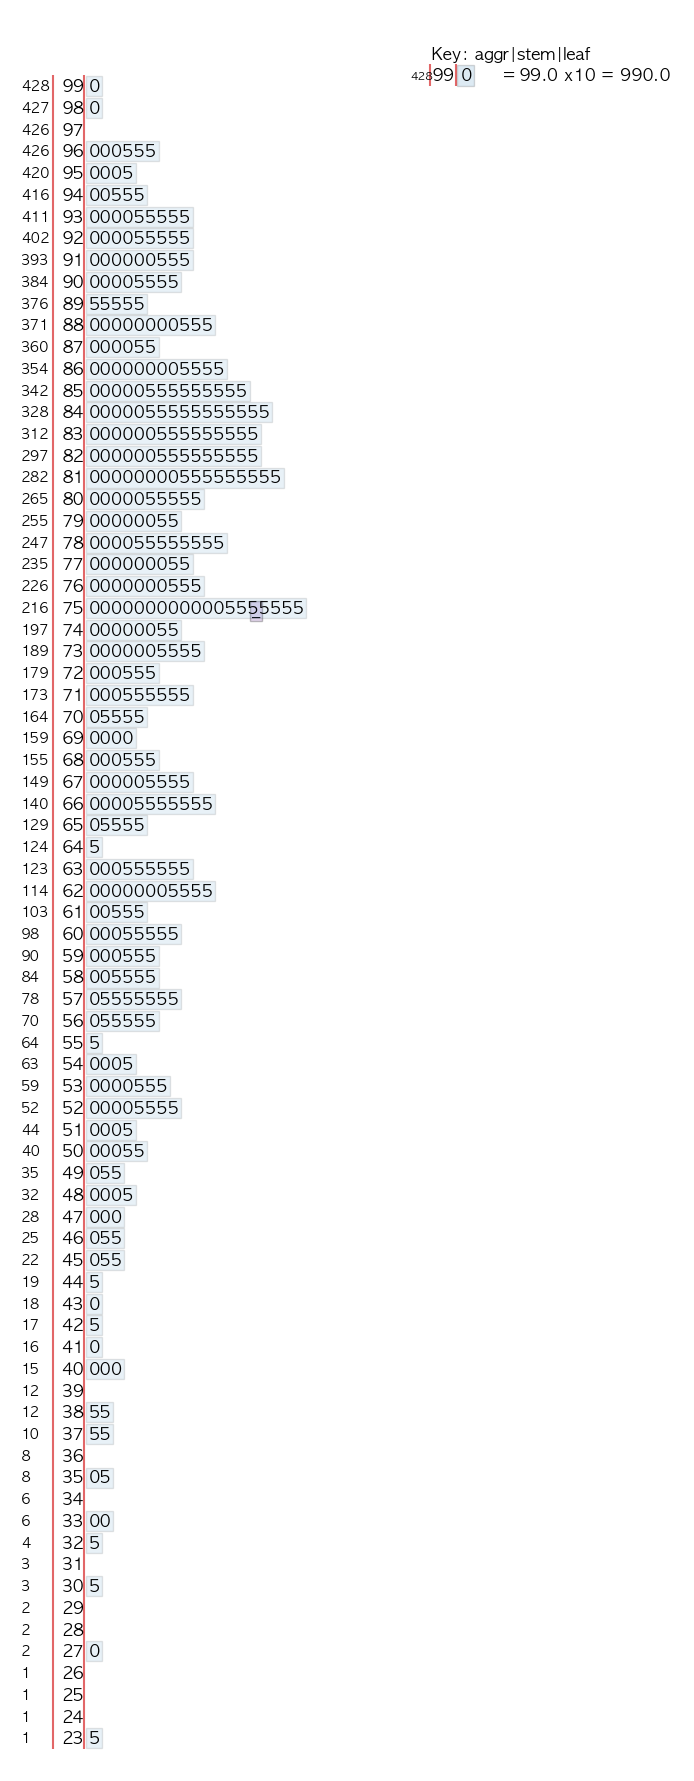

In [14]:
import stemgraphic
stemgraphic.stem_graphic(employ_data['토익점수'], scale = 10)
plt.show

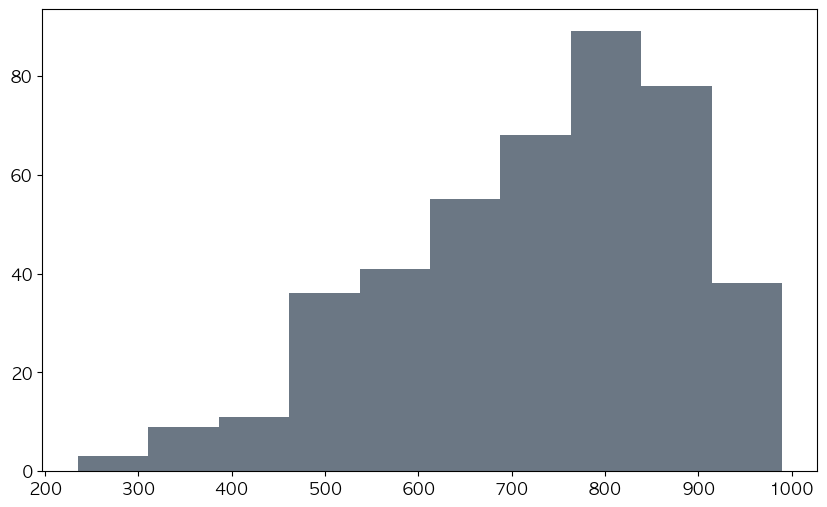

In [15]:
plt.hist(employ_data['토익점수'], bins=10, color='#2c3e50', alpha=0.7)
plt.show()

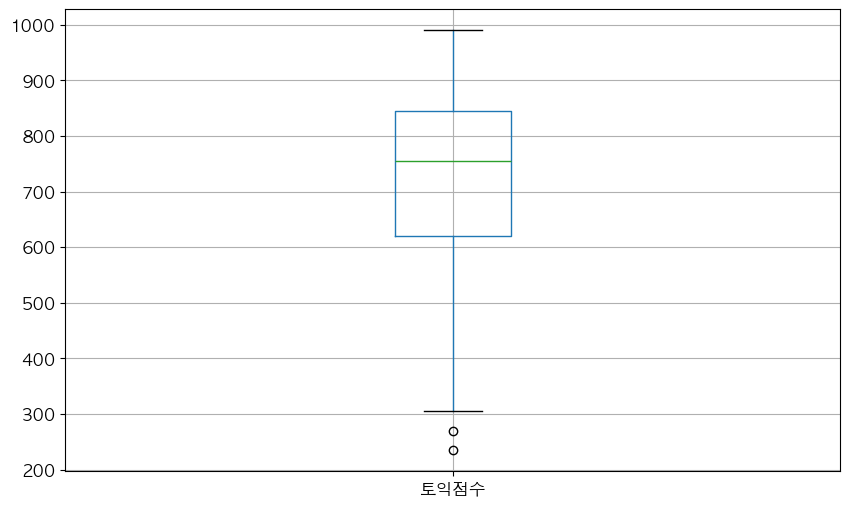

In [17]:
import matplotlib.pyplot as plt
employ_data[['토익점수']].boxplot()
plt.show()